<a href="https://colab.research.google.com/github/Joseph89155/house-price-prediction/blob/main/Predicting_House_Values_with_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 House Price Prediction Using Simple Linear Regression

## 👨‍💻 Author
**Project by:** Joseph Maina

**Self Guided project**

## 📌 Project Overview
This project demonstrates the foundational process of building a **Simple Linear Regression model** using Python. By training a model to predict house prices based on house area, it offers hands-on experience in machine learning and data science fundamentals.

## 🎯 Objectives
- Understand how linear regression works using a real-world dataset.
- Train a regression model with one independent variable (`area`) to predict house prices (`price`).
- Evaluate the model using standard performance metrics.
- Visualize data distributions and the resulting regression line.
- Prepare a portfolio-ready project to showcase basic machine learning skills.

## 🛠️ Process Summary
To accomplish these objectives, the project will follow these key steps:
1. **Data Exploration** – Load and inspect the dataset.
2. **Data Preparation** – Clean the data and split it into training/testing sets.
3. **Model Building** – Use Scikit-learn to train the linear regression model.
4. **Model Evaluation** – Calculate performance metrics like MAE, MSE, RMSE, and R².
5. **Visualization** – Plot actual vs. predicted prices with a regression line overlay.

## 🌍 Real-World Relevance
Predicting house prices is a common use case in real estate, financial modeling, and urban planning. Insights from such models help:
- Homebuyers estimate fair market values
- Sellers set strategic pricing
- Real estate analysts compare properties across regions

## 🧰 Tools & Technologies
- **Python** – Programming language
- **Pandas** – For data manipulation and analysis
- **Matplotlib & Seaborn** – For data visualization
- **Scikit-learn** – For machine learning modeling
- **Jupyter Notebook** – For interactive code and markdown documentation
---



 # Data Exploration

 ### In this phase, we begin by loading the dataset (`homeprices.csv`) and getting familiar with its structure and contents. This includes:
- Previewing the data
- Understanding data types
- Generating basic summary statistics
- Visualizing the relationship between `area` and `price` using a scatter plot

This helps us confirm the dataset's suitability for simple linear regression and identify any quirks to handle during preparation.

In [ ]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#  Load the dataset
df = pd.read_csv('homeprices.csv')

In [12]:
# Peek at the first few rows
print("Head of the dataset:")
print(df.head())

Head of the dataset:
   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


In [13]:
# Summary statistics
print("\nDataset summary:")
print(df.describe())


Dataset summary:
              area          price
count     5.000000       5.000000
mean   3280.000000  626000.000000
std     540.370243   74949.983322
min    2600.000000  550000.000000
25%    3000.000000  565000.000000
50%    3200.000000  610000.000000
75%    3600.000000  680000.000000
max    4000.000000  725000.000000


In [14]:
# Data types and null values
print("\nData info:")
print(df.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
None


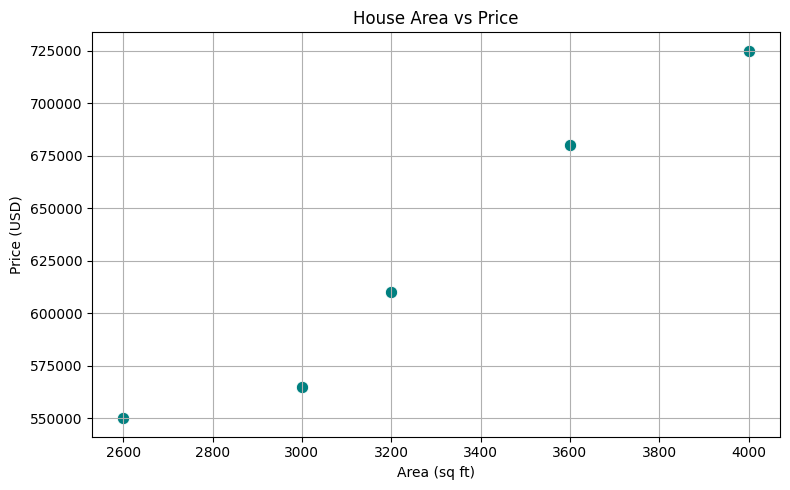

In [15]:
# Scatter plot of Area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='area', y='price', color='teal', s=80)
plt.title('House Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Preparation

### To ensure our model performs well and generalizes to new data, we split the dataset into two parts:
- **Training set**: Used to teach the model how area and price are related.
- **Testing set**: Used to evaluate the model on unseen data.

A common split ratio is **80% for training** and **20% for testing**. Before splitting, we also check for missing values or inconsistencies that could affect model performance.

In [16]:
# ✅ Check for null values
print("Missing values:\n", df.isnull().sum())

Missing values:
 area     0
price    0
dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

# ✅ Define features (X) and target (y)
X = df[['area']]  # Feature must be 2D
y = df['price']

In [19]:
# ✅ Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
print("\nTraining data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])



Training data size: 4
Testing data size: 1


# Building the Linear Regression Model


### With clean and prepared data, we now build a **Simple Linear Regression model** using the `LinearRegression` class from Scikit-learn.

The model will learn a linear equation of the form:price = m × area + b

Where:
- `m` is the slope (coefficient)
- `b` is the y-intercept

This trained model will then be used to make predictions on unseen test data.

In [30]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

In [23]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Output model parameters
print("Model trained successfully!")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Model trained successfully!
Coefficient (slope): 128.27
Intercept: 211542.06


# Model Evaluation.


### After training our linear regression model, it's important to assess how well it generalizes to new data. For this, we evaluate the model using the test set and the following metrics:

- **Mean Absolute Error (MAE)**: Average magnitude of errors in predictions (without direction).
- **Mean Squared Error (MSE)**: Penalizes larger errors more than MAE.
- **Root Mean Squared Error (RMSE)**: Square root of MSE; same units as the target.
- **R² Score (Coefficient of Determination)**: Indicates how well the model explains variation in the target variable. Ranges from 0 (poor fit) to 1 (perfect fit).

These metrics give us insights into both the accuracy and the consistency of the model's predictions.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict prices on the test set
y_pred = model.predict(X_test)

In [26]:
# Evaluate using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [27]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 31355.14
Mean Squared Error (MSE): 983144816.14
Root Mean Squared Error (RMSE): 31355.14
R² Score: nan


# Visualizing the Regression Line

### To better understand the model's behavior, we visualize the relationship between house area and price:

- The **scatter plot** shows actual data points.
- The **regression line** represents the model's prediction path.

This plot helps us quickly assess whether the linear model is a good approximation for the data.

In [28]:
# Predict prices using the entire dataset
predicted_prices = model.predict(X)

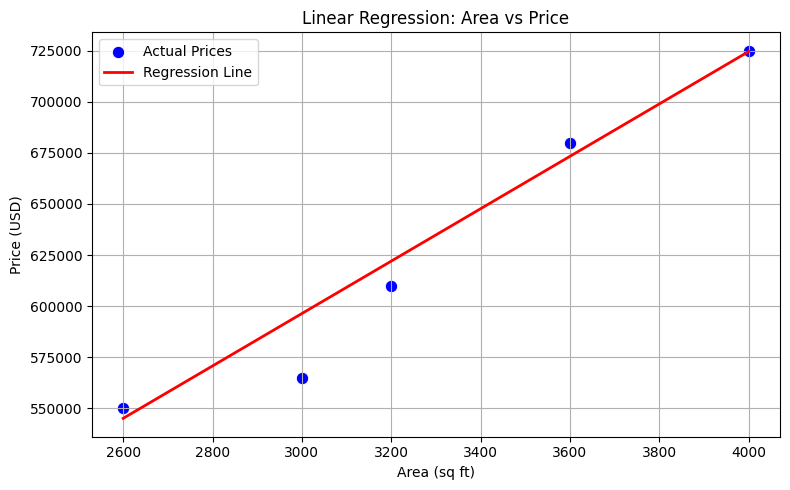

In [29]:
# Plot actual data points and regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df, color='blue', s=80, label='Actual Prices')
plt.plot(df['area'], predicted_prices, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Conclusion & Reflections

This project showcased the practical steps to build a **Simple Linear Regression model** in Python to predict house prices based solely on area. It was designed to:
- Introduce foundational machine learning concepts
- Walk through data loading, cleaning, modeling, and evaluation
- Generate visual insights that connect predictions with real-world data

### 📌 Key Takeaways
- We trained a model to learn the relationship between house **area** and **price**
- Despite a small dataset, we illustrated every step of a proper ML workflow
- We explored model performance through metrics and visuals
- We discussed limitations and potential enhancements (like using more features or data)

---

## 🔮 What's Next?

Now that the base model is working, here are some exciting directions to explore:
- 🔁 **Use cross-validation** for more robust performance assessment
- 🔀 **Expand to multiple linear regression** using `homeprices-m.csv`
- 🌐 **Deploy the model** to a simple web app (e.g., with Streamlit or Flask)
- 📈 Try **non-linear regression** or **feature engineering** on bigger datasets

---

| Element          | Details                              |
|------------------|---------------------------------------|
| **Technique**     | Simple Linear Regression              |
| **Dataset**       | `homeprices.csv`                      |
| **Target Variable** | `price`                            |
| **Feature Used**  | `area`                               |
| **Libraries**     | pandas, matplotlib, seaborn, sklearn |
| **Platform**      | Jupyter Notebook                     |

---
